In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\akhil\Downloads\Titanic DS\Global Terrorism\globalterrorismdb.csv', engine='python')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [4]:
df.isnull().sum().sort_index(ascending=True)

INT_ANY                    0
INT_IDEO                   0
INT_LOG                    0
INT_MISC                   0
addnotes              153402
alternative           152680
alternative_txt       152680
approxdate            172452
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
city                     434
claim2                179801
claim3                181373
claimed                66120
claimmode             162608
claimmode2            181075
claimmode2_txt        181075
claimmode3            181558
claimmode3_txt        181558
claimmode_txt         162608
compclaim             176852
corp1                  42550
corp2                 171574
corp3                 180665
country                    0
country_txt                0
crit1                      0
crit2                      0
crit3                      0
dbsource                   0
divert        

In [5]:
100* (df.isnull().sum()/df.shape[0]).sort_values()

eventid                0.000000
crit3                  0.000000
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
INT_LOG                0.000000
crit2                  0.000000
dbsource               0.000000
targtype1_txt          0.000000
property               0.000000
gname                  0.000000
weaptype1_txt          0.000000
weaptype1              0.000000
INT_ANY                0.000000
individual             0.000000
crit1                  0.000000
targtype1              0.000000
region_txt             0.000000
vicinity               0.000000
country                0.000000
iyear                  0.000000
extended               0.000000
imonth                 0.000000
INT_IDEO               0.000000
INT_MISC               0.000000
iday                   0.000000
region                 0.000000
country_txt            0.000000
doubtterr              0.000550
multiple               0.000550
specific

In [6]:
#let's rename some important columns
df=df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [7]:
terrorism_df=df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [8]:
terrorism_df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary


In [9]:
terrorism_df.shape

(181691, 12)

In [10]:
terrorism_df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
State               421
City                434
Attack_type           0
Target_type           0
Target_subtype    10373
Gang_name             0
Weapon_type           0
dtype: int64

In [11]:
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')
terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')
terrorism_df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [12]:
terrorism_df['Country'].nunique()

205

In [13]:
print(terrorism_df['Region'].value_counts())

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64


In [14]:
terrorism_df['Attack_type'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [15]:
print(terrorism_df['Attack_type'].value_counts())

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64


In [16]:
print(terrorism_df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [17]:
print(terrorism_df['Target_type'].value_counts())

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64


In [18]:
print(terrorism_df['Gang_name'].nunique())

3537


In [19]:
print(terrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other'
 'Biological']


In [20]:
terrorism_df['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [21]:
print(terrorism_df['Weapon_type'].value_counts())

Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: Weapon_type, dtype: int64


In [22]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            181691 non-null  int64 
 1   Month           181691 non-null  int64 
 2   Day             181691 non-null  int64 
 3   Country         181691 non-null  object
 4   Region          181691 non-null  object
 5   State           181691 non-null  object
 6   City            181691 non-null  object
 7   Attack_type     181691 non-null  object
 8   Target_type     181691 non-null  object
 9   Target_subtype  181691 non-null  object
 10  Gang_name       181691 non-null  object
 11  Weapon_type     181691 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.6+ MB


<IPython.core.display.Javascript object>

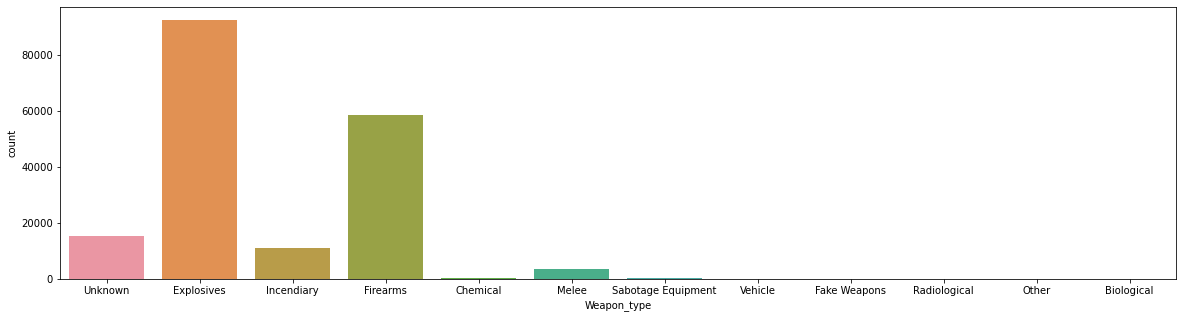

In [23]:
plt.figure(figsize=(20,5));
sns.countplot(terrorism_df['Weapon_type']);

<IPython.core.display.Javascript object>

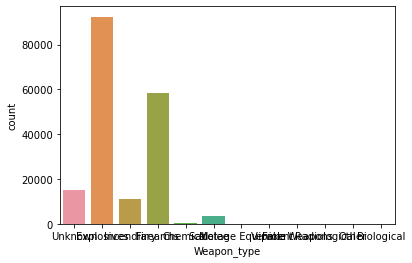

In [24]:
sns.countplot(terrorism_df['Weapon_type']);

<IPython.core.display.Javascript object>

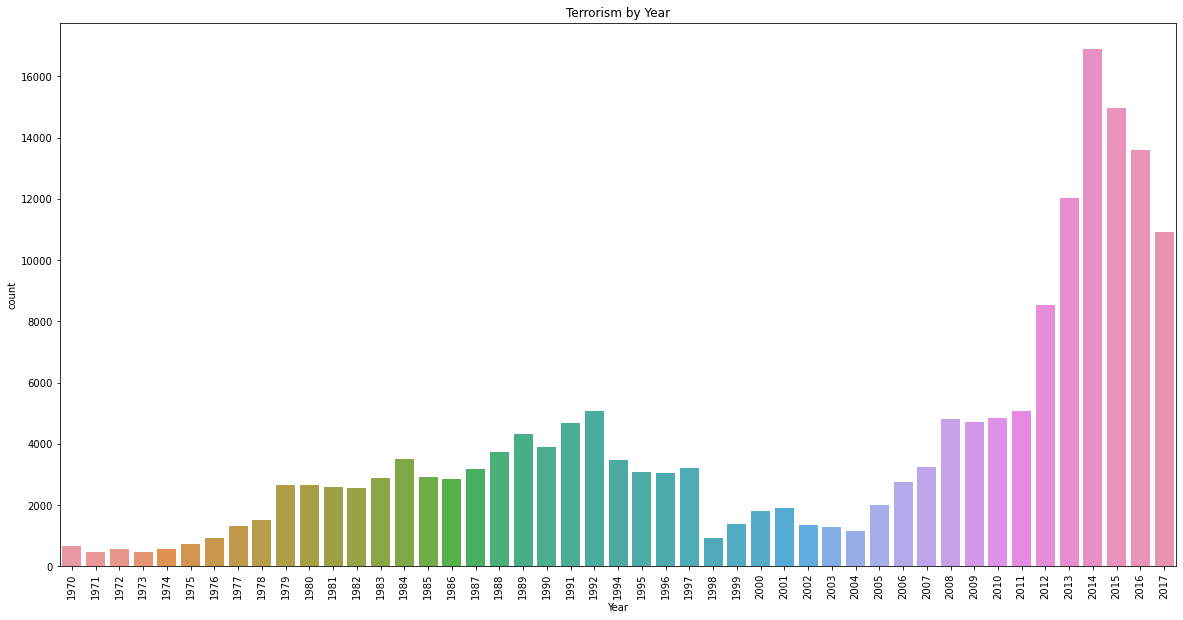

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(terrorism_df['Year']);
plt.xticks(rotation = 90)
b = plt.title('Terrorism by Year')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Terrorism by Month')

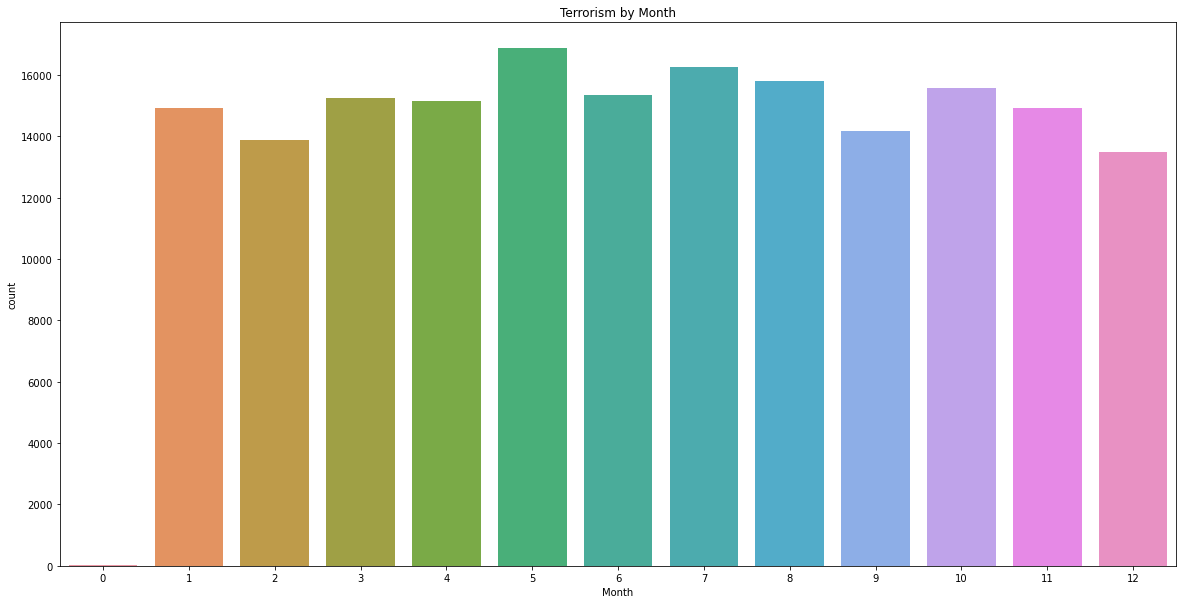

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(terrorism_df['Month'])
plt.title('Terrorism by Month')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Attacks by Day')

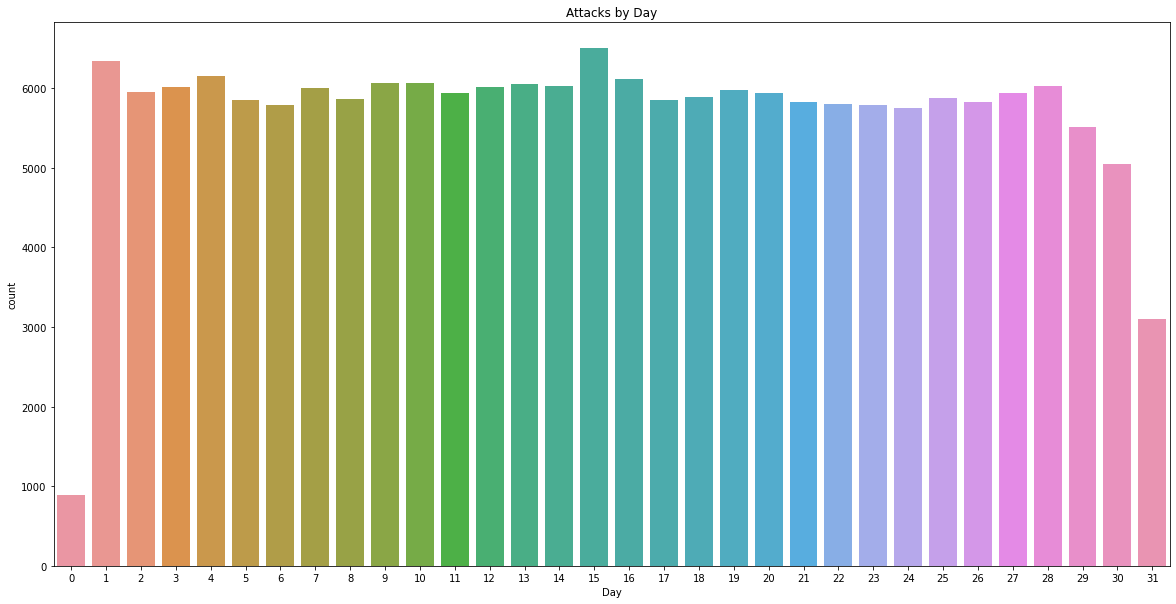

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(terrorism_df['Day'])
p = plt.title('Attacks by Day')

### Almost Every day has the same contribution but attacks were low during 31st and high during 15th and 1st.

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Country', ylabel='count'>

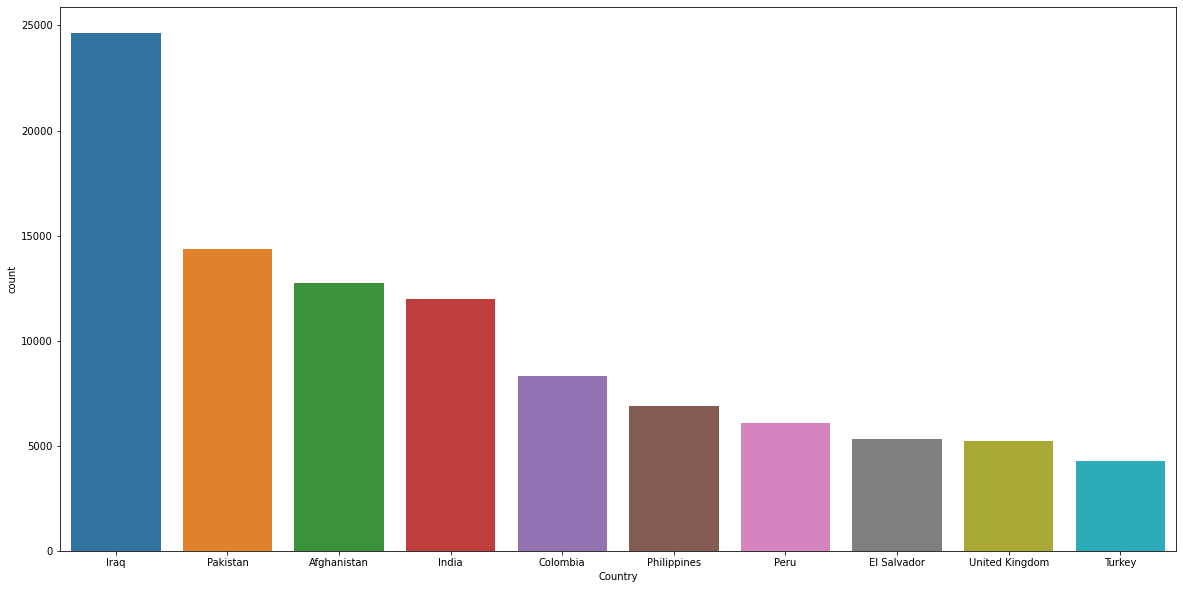

In [52]:
plt.figure(figsize=(20,10))

sns.countplot(x= terrorism_df['Country'], order=terrorism_df['Country'].value_counts().iloc[:10].index)
# sns.countplot(terrorism_df['Country'])
# p = plt.title('Attacks by Country')

### Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.

<IPython.core.display.Javascript object>

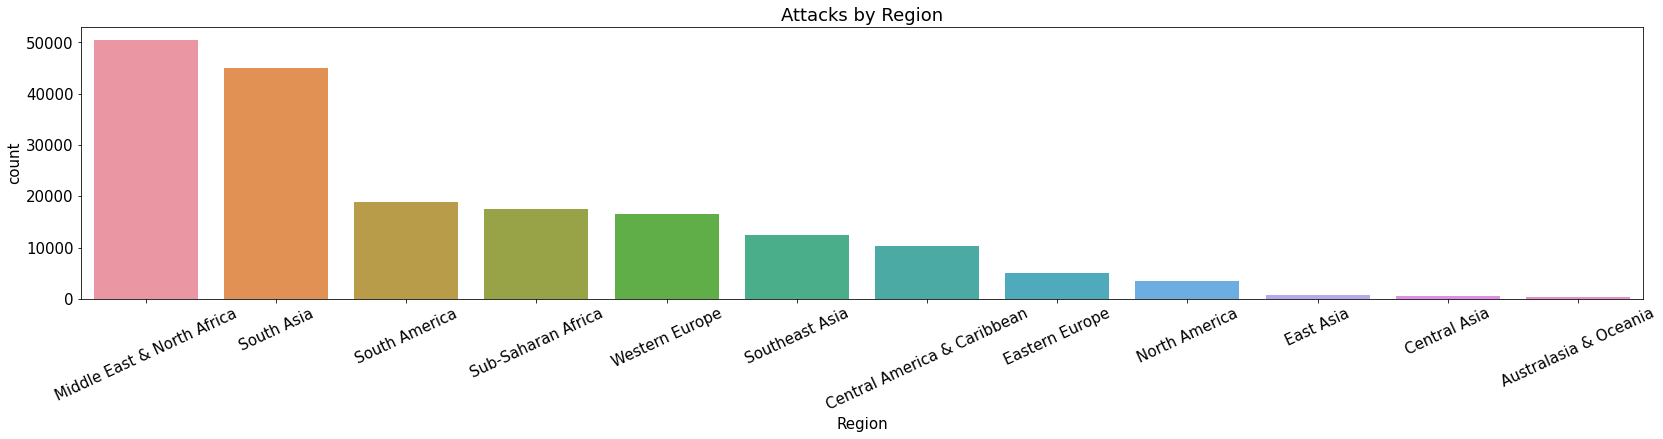

In [60]:
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 25)
plt.title('Attacks by Region')
sns.countplot(x=terrorism_df['Region'], order= terrorism_df['Region'].value_counts().index);

### The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.

<IPython.core.display.Javascript object>

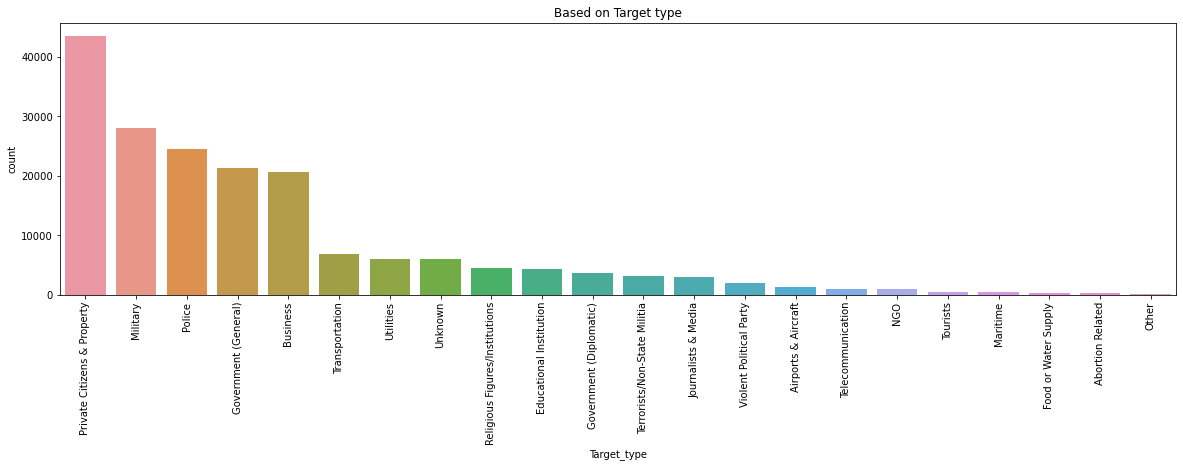

In [59]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
plt.title('Based on Target type')
p = sns.countplot(x=terrorism_df['Target_type'], order= terrorism_df['Target_type'].value_counts().index)

### For most of the attacks, the target is Private Citizens& property and the next Military leads.

<IPython.core.display.Javascript object>

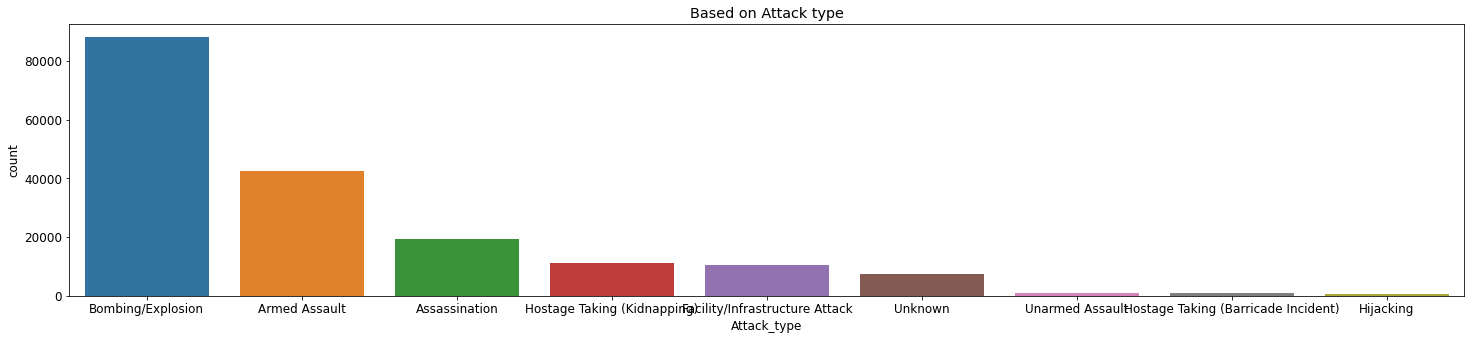

In [61]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sns.countplot(x=terrorism_df['Attack_type'], order= terrorism_df['Attack_type'].value_counts().index);

### Most of the attacks were through either Bombing or Explosion.